# Exploratory Data Analysis (EDA) Template

## 1. Importació de Biblioteques

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

# Carregar el dataset

In [9]:
df = pd.read_csv('bank_dataset.csv')

# Mostra les primeres files del dataset

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Informació general del dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


# Descripció estadística del dataset

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Histograma de cada variable numèrica

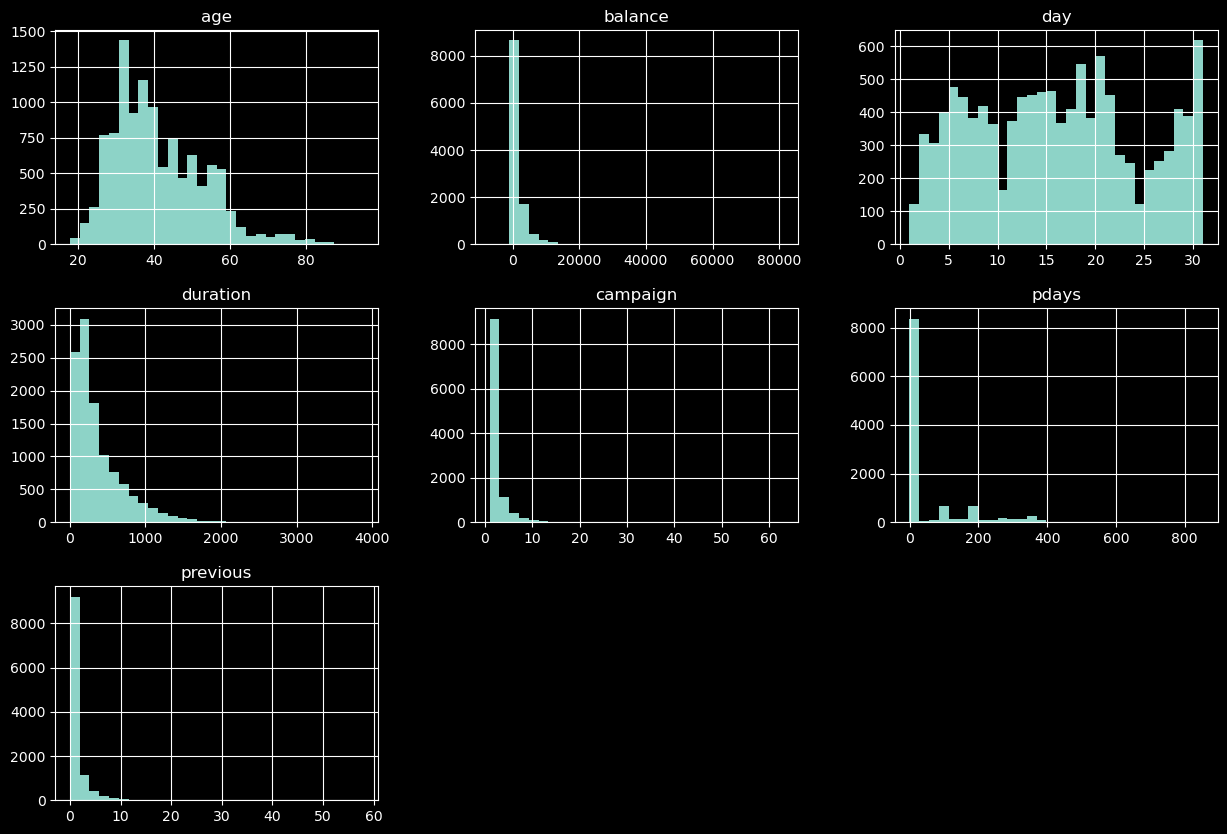

In [13]:
df.hist(bins=30, figsize=(15, 10))
plt.show()


# Comptar els valors de cada variable categòrica

In [14]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())


management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
married     6349
single      3517
divorced    1291
Name: marital, dtype: int64
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: education, dtype: int64
no     10994
yes      168
Name: default, dtype: int64
no     5881
yes    5281
Name: housing, dtype: int64
no     9702
yes    1460
Name: loan, dtype: int64
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64
unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64
no     5873
yes    5289
Name: d

# Visualització de valors nuls

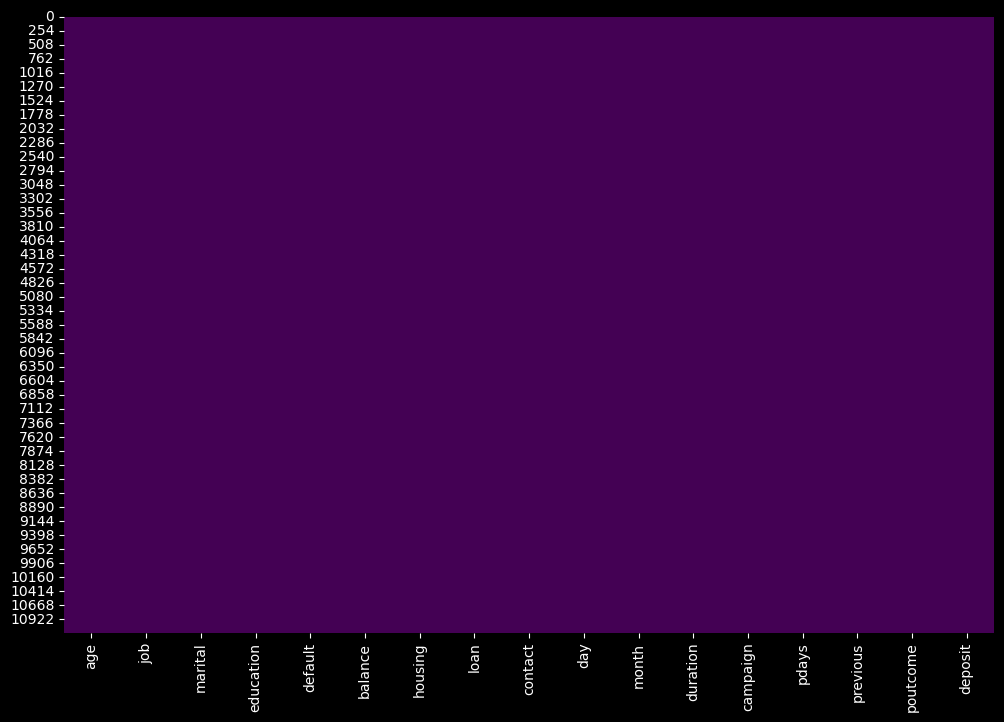

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Comptar valors nuls per columna

In [16]:
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

# EDA automàtic amb Sweetviz

In [17]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Conclusions

Observant la matriu d'associacions generada amb SweetViz podem dir que, de manera general, el major predictor de l'èxit de la nova campanya és el comportament del client en la campanya anterior i el contacte recurrent amb el client.
Observem una forta correlació entre les variables previous,pdays i poutcome.
Malgrat observem una correlació directa entre duration i deposit, les pròpies metadades del dataset ens adverteixen que aquesta variable no es pot fer servir per fer prediccions, donada la immediatesa de la trucada amb el resultat obtingut.
